- Yahoo Finance 에서 주가 데이터 다운로드 (https://finance.yahoo.com/)
- 검색 후 Historical Data 선택
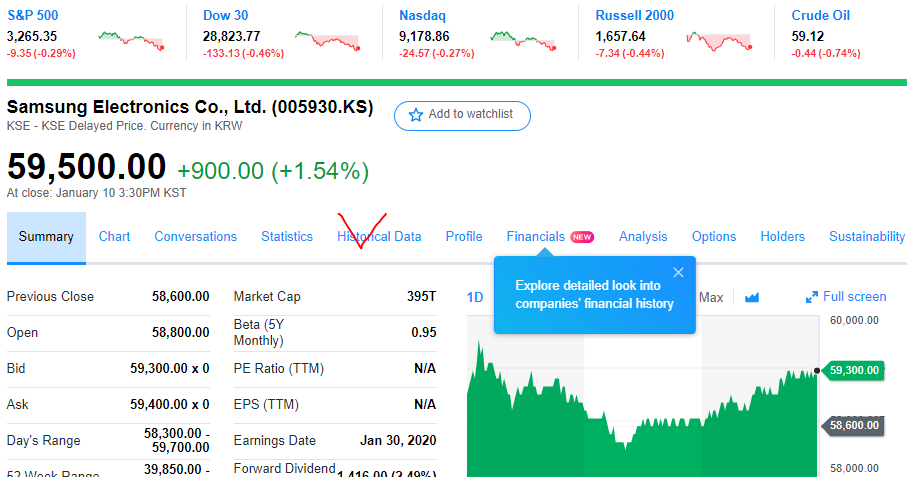

- 기간 선택 후 Download Data 클릭
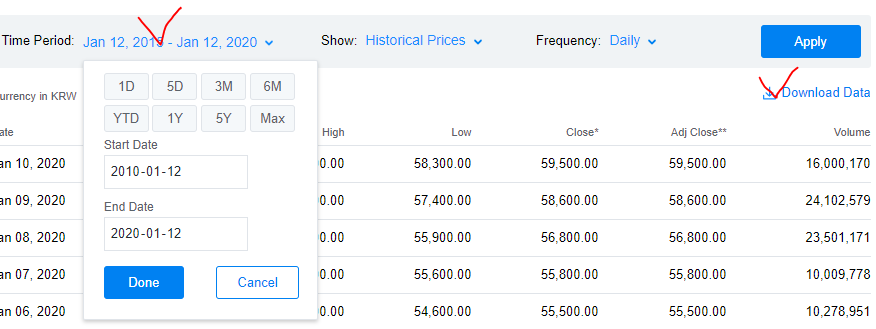

## Data Loading 및 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('005930.KS.csv')
df.shape

(5457, 7)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4719.226074,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4309.866211,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4340.761230,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4278.971680,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4456.618652,46880000.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5452,2021-09-09,76400.0,76600.0,75000.0,75300.0,75300.0,17600770.0
5453,2021-09-10,75300.0,75600.0,74800.0,75300.0,75300.0,10103212.0
5454,2021-09-13,75200.0,76300.0,75100.0,76300.0,76300.0,11397775.0
5455,2021-09-14,77100.0,77700.0,76600.0,76600.0,76600.0,18167057.0
5456,2021-09-15,77400.0,77400.0,76400.0,77200.0,77200.0,7625435.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5457 entries, 0 to 5456
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5457 non-null   object 
 1   Open       5451 non-null   float64
 2   High       5451 non-null   float64
 3   Low        5451 non-null   float64
 4   Close      5451 non-null   float64
 5   Adj Close  5451 non-null   float64
 6   Volume     5451 non-null   float64
dtypes: float64(6), object(1)
memory usage: 298.6+ KB


In [6]:
df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [7]:
df[df['Open'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN


# 전처리
- date를 index
- 결측치 제거
- Adj Close 컬럼 제거
- MinMaxScaling

In [8]:
# Data: 문자열->Datetime 타입변경
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5457 entries, 0 to 5456
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5457 non-null   datetime64[ns]
 1   Open       5451 non-null   float64       
 2   High       5451 non-null   float64       
 3   Low        5451 non-null   float64       
 4   Close      5451 non-null   float64       
 5   Adj Close  5451 non-null   float64       
 6   Volume     5451 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 298.6 KB


In [9]:
# Data를 index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4719.226074,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4309.866211,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4340.761230,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4278.971680,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4456.618652,46880000.0


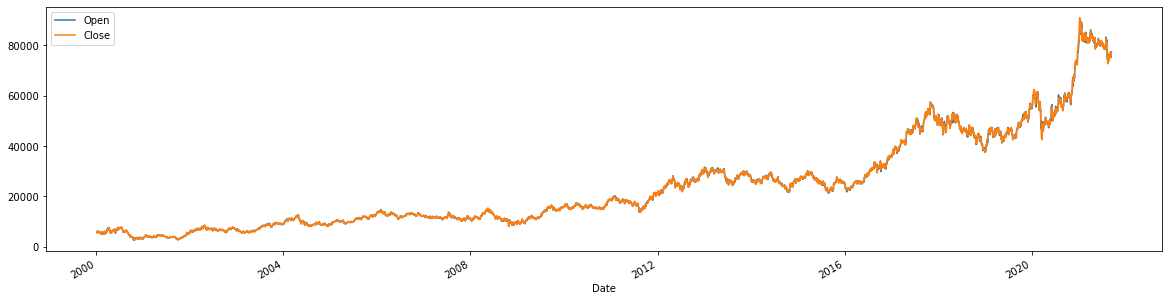

In [10]:
df[['Open', 'Close']].plot(figsize=(20,5))
plt.show()

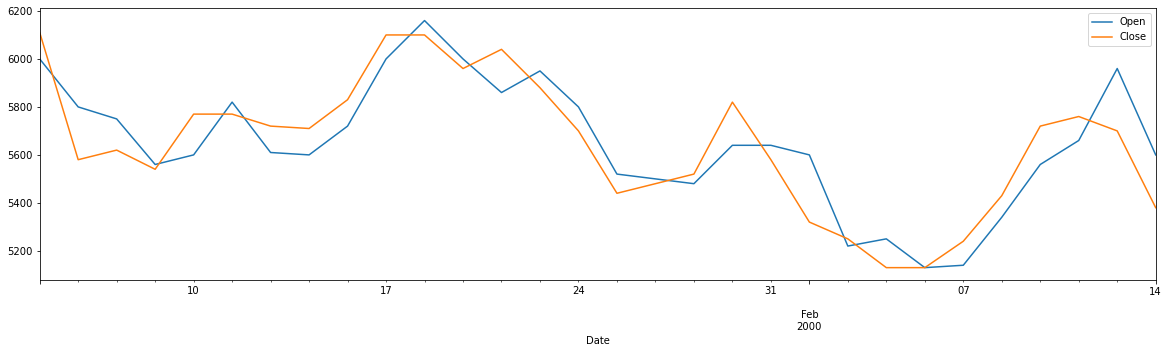

In [11]:
df[['Open', 'Close']].iloc[:30].plot(figsize=(20,5))
plt.show()

In [12]:
# 결측치 제거
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5451 entries, 2000-01-04 to 2021-09-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5451 non-null   float64
 1   High       5451 non-null   float64
 2   Low        5451 non-null   float64
 3   Close      5451 non-null   float64
 4   Adj Close  5451 non-null   float64
 5   Volume     5451 non-null   float64
dtypes: float64(6)
memory usage: 298.1 KB


In [14]:
# Adj Close 컬럼 제거 (Close 컬럼과 중복)
df.drop(columns=['Adj Close'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5451 entries, 2000-01-04 to 2021-09-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5451 non-null   float64
 1   High    5451 non-null   float64
 2   Low     5451 non-null   float64
 3   Close   5451 non-null   float64
 4   Volume  5451 non-null   float64
dtypes: float64(5)
memory usage: 255.5 KB


In [16]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000.0
2000-01-11,5820.0,6100.0,5770.0,5770.0,59745000.0
2000-01-12,5610.0,5740.0,5600.0,5720.0,29220000.0
2000-01-13,5600.0,5740.0,5560.0,5710.0,41190000.0
2000-01-14,5720.0,5880.0,5680.0,5830.0,49375000.0


### X, y 분리

In [17]:
# y: 종가를 복사
df_y = df['Close'].to_frame() #Series.to_frame()=>Series(1차원)를 DataFrame(2차원)으로 변환
df_X = df

### Scaling - MinMaxScaler
- Scaler를 X, y 용 따로 만든다.
    - y를 inverse 하기 위해

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler() #df_X용
scaler_Y = MinMaxScaler() #df_y용

X = scaler_X.fit_transform(df_X)
y = scaler_Y.fit_transform(df_y)

##  날짜 종가 예측
- X: 50일치 주가, y: 51일째 주가. 
    - 50일의 연속된 주식가격으로 51일째 주가를 예측한다.
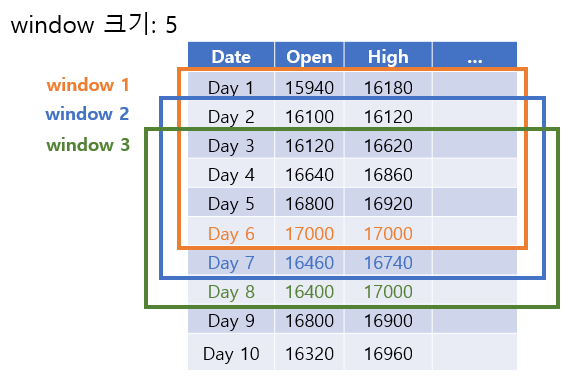     

X, y를 만든다.
각 index에 window size의 데이터셋이 들어가도록 한다.

In [19]:
X.shape, y.shape, type(X), y.size, len(y)

((5451, 5), (5451, 1), numpy.ndarray, 5451, 5451)

In [20]:
window_size = 50
data_X = []  #input(feature) 데이터들을 저장할 리스트
data_y = []  #output(label-target) 데이터들을 저장할 리스트

for i in range(0, y.size-window_size): #y.size-windw_size: 이 이후 index는 50개가 안되므로 데이터셋을 만들 수 없다.
    _X = X[i:i+window_size]
    _y = y[i+window_size]
    data_X.append(_X)
    data_y.append(_y)

In [21]:
len(data_X), len(data_y)

(5401, 5401)

In [22]:
data_X[0]

array([[0.03942571, 0.03562314, 0.03720717, 0.03829161, 0.45181622],
       [0.03714676, 0.03509145, 0.03559945, 0.0322873 , 0.45476966],
       [0.03657703, 0.03211399, 0.03628847, 0.03274046, 0.33121213],
       [0.03441203, 0.03094428, 0.03376206, 0.03183415, 0.24544043],
       [0.03486782, 0.03200766, 0.03628847, 0.03443979, 0.2854794 ],
       [0.03737466, 0.0355168 , 0.03847037, 0.03443979, 0.36382182],
       [0.03498177, 0.03168864, 0.03651814, 0.03387334, 0.17793746],
       [0.03486782, 0.03168864, 0.0360588 , 0.03376005, 0.2508297 ],
       [0.03623519, 0.03317737, 0.03743684, 0.03511952, 0.3006729 ],
       [0.03942571, 0.0363675 , 0.04019293, 0.03817832, 0.38671863],
       [0.04124886, 0.03615483, 0.04088195, 0.03817832, 0.27561429],
       [0.03942571, 0.03487877, 0.04065227, 0.03659227, 0.24483147],
       [0.03783045, 0.03487877, 0.03904456, 0.03749858, 0.22723259],
       [0.03885597, 0.03424075, 0.03973358, 0.03568596, 0.19812441],
       [0.03714676, 0.03339005, 0.

In [23]:
data_y[0]

array([0.02809562])

In [24]:
np.shape(data_X), np.shape(data_y)

((5401, 50, 5), (5401, 1))

## Train, Test 분리

In [25]:
train_size = int(len(data_X) *0.8)  # 전체 데이터중 80%
test_size = len(data_X) - train_size
train_size, test_size, train_size+test_size

(4320, 1081, 5401)

In [26]:
X_train = np.array(data_X[:train_size])
X_test = np.array(data_X[train_size:])

y_train = np.array(data_y[:train_size])
y_test = np.array(data_y[train_size:])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4320, 50, 5), (1081, 50, 5), (4320, 1), (1081, 1))

### import

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

### 하이퍼파라미터 설정

In [28]:
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 100

N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]

### Dataset

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

## Model 생성
- LSTM 레이어는 return_sequences 인자에 따라 마지막 시퀀스에서 한 번만 출력할 수 있고 각 시퀀스에서 출력을 할 수 있다. 
    - return_sequences=True: 시퀀스마다 결과를 출력. False(기본값): 전체 Sequence를 처리하고 결과를 하나만 출력
- many to many 문제를 풀거나 LSTM 레이어를 여러개로 쌓아올릴 때는 return_sequence=True 옵션을 사용. 
- Dese에는 False로 해서 하나만 전달.
- 아래 그림에서 왼쪽은 return_sequences=False일 때, 오른쪽은 return_sequence=True일 때의 형상.

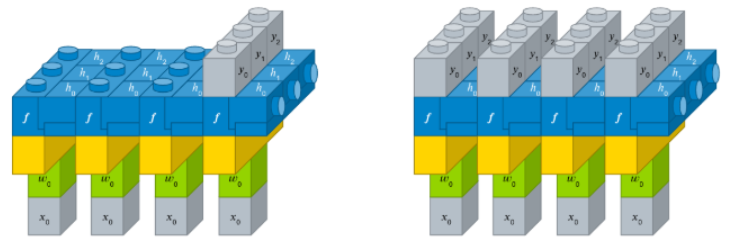

<center>[출처: https://tykimos.github.io/2017/04/09/RNN_Getting_Started]</center>

In [30]:
X_train.shape

(4320, 50, 5)

In [31]:
def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(32, activation='relu', return_sequences=False, input_shape=(50,5)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1)) #회귀
    
    return model

In [32]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4864      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


In [33]:
np.__version__

'1.19.5'

## 모델 학습, 평가

In [34]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/100
43/43 [==============================] - 3s 30ms/step - loss: 0.0083 - val_loss: 0.1408
Epoch 2/100
43/43 [==============================] - 1s 25ms/step - loss: 1.2452e-04 - val_loss: 1.2608
Epoch 3/100
43/43 [==============================] - 1s 26ms/step - loss: 5.7024e-05 - val_loss: 0.1143
Epoch 4/100
43/43 [==============================] - 1s 26ms/step - loss: 3.7716e-05 - val_loss: 0.0448
Epoch 5/100
43/43 [==============================] - ETA: 0s - loss: 3.4879e-0 - 1s 26ms/step - loss: 3.4679e-05 - val_loss: 0.0183
Epoch 6/100
43/43 [==============================] - 1s 28ms/step - loss: 3.4157e-05 - val_loss: 0.0088
Epoch 7/100
43/43 [==============================] - 1s 27ms/step - loss: 3.2631e-05 - val_loss: 0.0048
Epoch 8/100
43/43 [==============================] - 1s 27ms/step - loss: 3.2266e-05 - val_loss: 0.0048
Epoch 9/100
43/43 [==============================] - 1s 28ms/step - loss: 3.2296e-05 - val_loss: 0.0024
Epoch 10/100
43/43 [====================

43/43 [==============================] - 1s 19ms/step - loss: 2.0972e-05 - val_loss: 5.6867e-04
Epoch 78/100
43/43 [==============================] - 1s 19ms/step - loss: 2.0154e-05 - val_loss: 0.0012
Epoch 79/100
43/43 [==============================] - 1s 18ms/step - loss: 2.0233e-05 - val_loss: 0.0013
Epoch 80/100
43/43 [==============================] - 1s 19ms/step - loss: 2.0126e-05 - val_loss: 0.0014
Epoch 81/100
43/43 [==============================] - 1s 19ms/step - loss: 1.9701e-05 - val_loss: 0.0018
Epoch 82/100
43/43 [==============================] - 1s 19ms/step - loss: 2.0607e-05 - val_loss: 0.0016
Epoch 83/100
43/43 [==============================] - 1s 19ms/step - loss: 2.0576e-05 - val_loss: 0.0013
Epoch 84/100
43/43 [==============================] - 1s 19ms/step - loss: 2.1528e-05 - val_loss: 0.0014
Epoch 85/100
43/43 [==============================] - 1s 23ms/step - loss: 2.0335e-05 - val_loss: 0.0020
Epoch 86/100
43/43 [==============================] - 1s 19ms/st

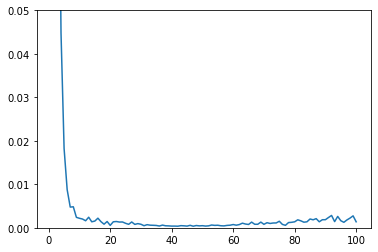

In [36]:
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'])
plt.ylim(0,0.05)
plt.show()

In [37]:
model.evaluate(test_dataset)

11/11 [==============================] - 0s 14ms/step - loss: 0.0014


0.0013828162336722016

## 예측

In [41]:
X.shape

(5451, 5)

In [44]:
X[-50:].shape

(50, 5)

In [45]:
new_data = X[-50:]
new_data = new_data[np.newaxis, ...]
new_data.shape

(1, 50, 5)

In [46]:
pred = model.predict(new_data)

In [47]:
pred

array([[0.8976854]], dtype=float32)

In [48]:
scaler_Y.inverse_transform(pred)

array([[81968.69]], dtype=float32)

In [ ]:
|